In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../../../Bigdata Files/Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [9]:
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

<Axes: xlabel='Species', ylabel='count'>

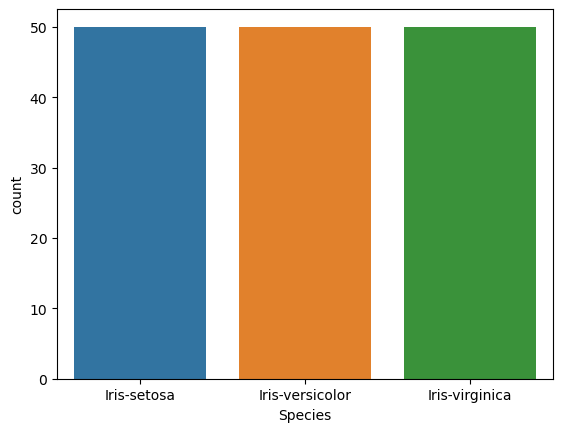

In [10]:
sns.countplot(x=df.Species,data=df)

In [11]:
df.duplicated().sum()

0

In [12]:
X=df.drop(["Id","Species"],axis=1).values
y=df["Species"].values

In [15]:
# X

In [17]:
# sns.pairplot(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# normaliztion
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)
# alternative
# X_train=scaler.fit_transform(X_train)
# X_test=scaler.fit_transform(X_test)
X_train=scaler.transform(X_train)
X_test=scaler.transform(X_test)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [23]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [24]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       0.87      1.00      0.93        13
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.96        45
      macro avg       0.96      0.95      0.95        45
   weighted avg       0.96      0.96      0.96        45



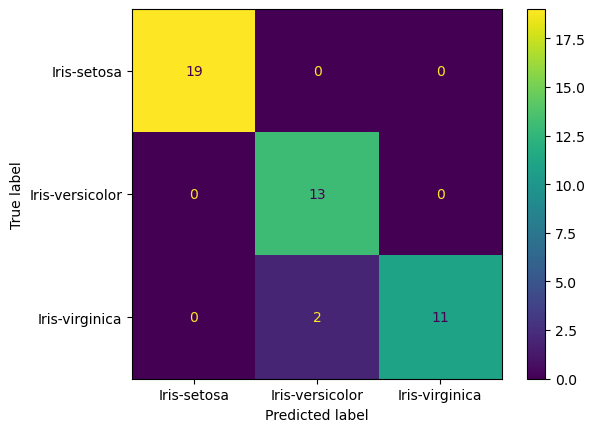

In [25]:
labels=["Iris-setosa","Iris-versicolor","Iris-virginica"]
cmd=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=labels)
cmd.plot()

In [26]:
# how to form tree

In [ ]:
# random forest algo semi

[Text(0.3333333333333333, 0.9375, 'x[3] <= -0.592\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4444444444444444, 0.8125, 'x[2] <= 0.513\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]'),
 Text(0.2222222222222222, 0.6875, 'x[3] <= 0.489\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.6666666666666666, 0.6875, 'x[2] <= 0.747\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]'),
 Text(0.5555555555555556, 0.5625, 'x[3] <= 0.691\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]'),
 Text(0.3333333333333333, 0.4375, 'x[1] <= -1.585\nentropy = 0.918\nsamples = 6\nvalue = [0, 4, 2]'),
 Text(0.2222222222222222, 0.3125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.4444444444444444, 0.3125, 'x[2] <

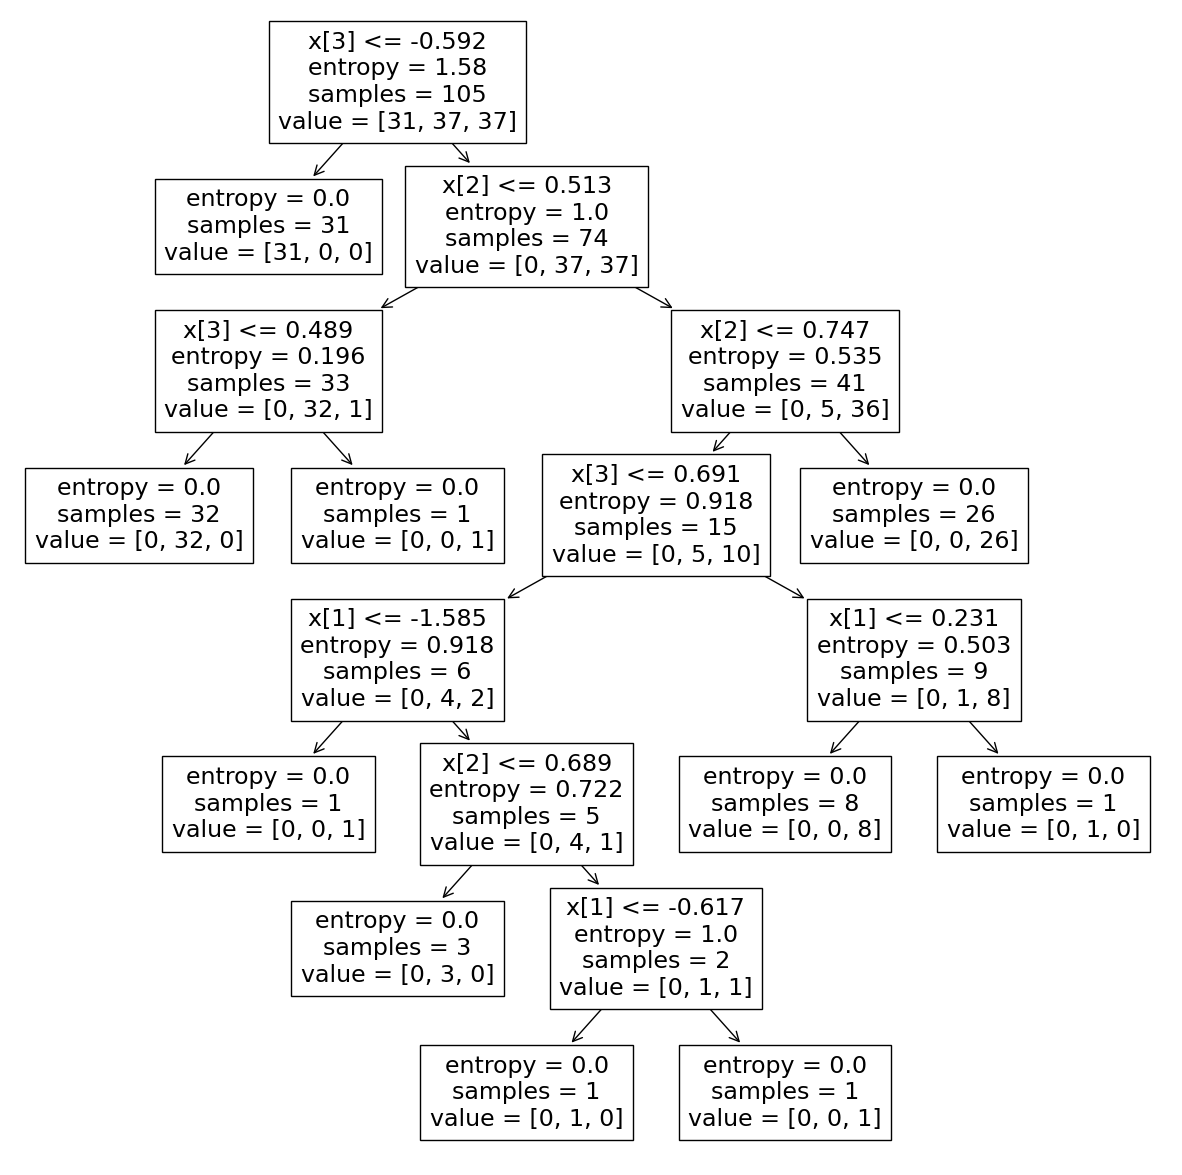

In [27]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model)

[Text(0.3333333333333333, 0.9375, 'PetalWidthCm <= -0.592\nentropy = 1.58\nsamples = 105\nvalue = [31, 37, 37]\nclass = Iris-virginica'),
 Text(0.2222222222222222, 0.8125, 'entropy = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = Iris-versicolor'),
 Text(0.4444444444444444, 0.8125, 'PetalLengthCm <= 0.513\nentropy = 1.0\nsamples = 74\nvalue = [0, 37, 37]\nclass = Iris-virginica'),
 Text(0.2222222222222222, 0.6875, 'PetalWidthCm <= 0.489\nentropy = 0.196\nsamples = 33\nvalue = [0, 32, 1]\nclass = Iris-virginica'),
 Text(0.1111111111111111, 0.5625, 'entropy = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = Iris-virginica'),
 Text(0.3333333333333333, 0.5625, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-setosa'),
 Text(0.6666666666666666, 0.6875, 'PetalLengthCm <= 0.747\nentropy = 0.535\nsamples = 41\nvalue = [0, 5, 36]\nclass = Iris-setosa'),
 Text(0.5555555555555556, 0.5625, 'PetalWidthCm <= 0.691\nentropy = 0.918\nsamples = 15\nvalue = [0, 5, 10]\nclass = Iris-setosa'),
 

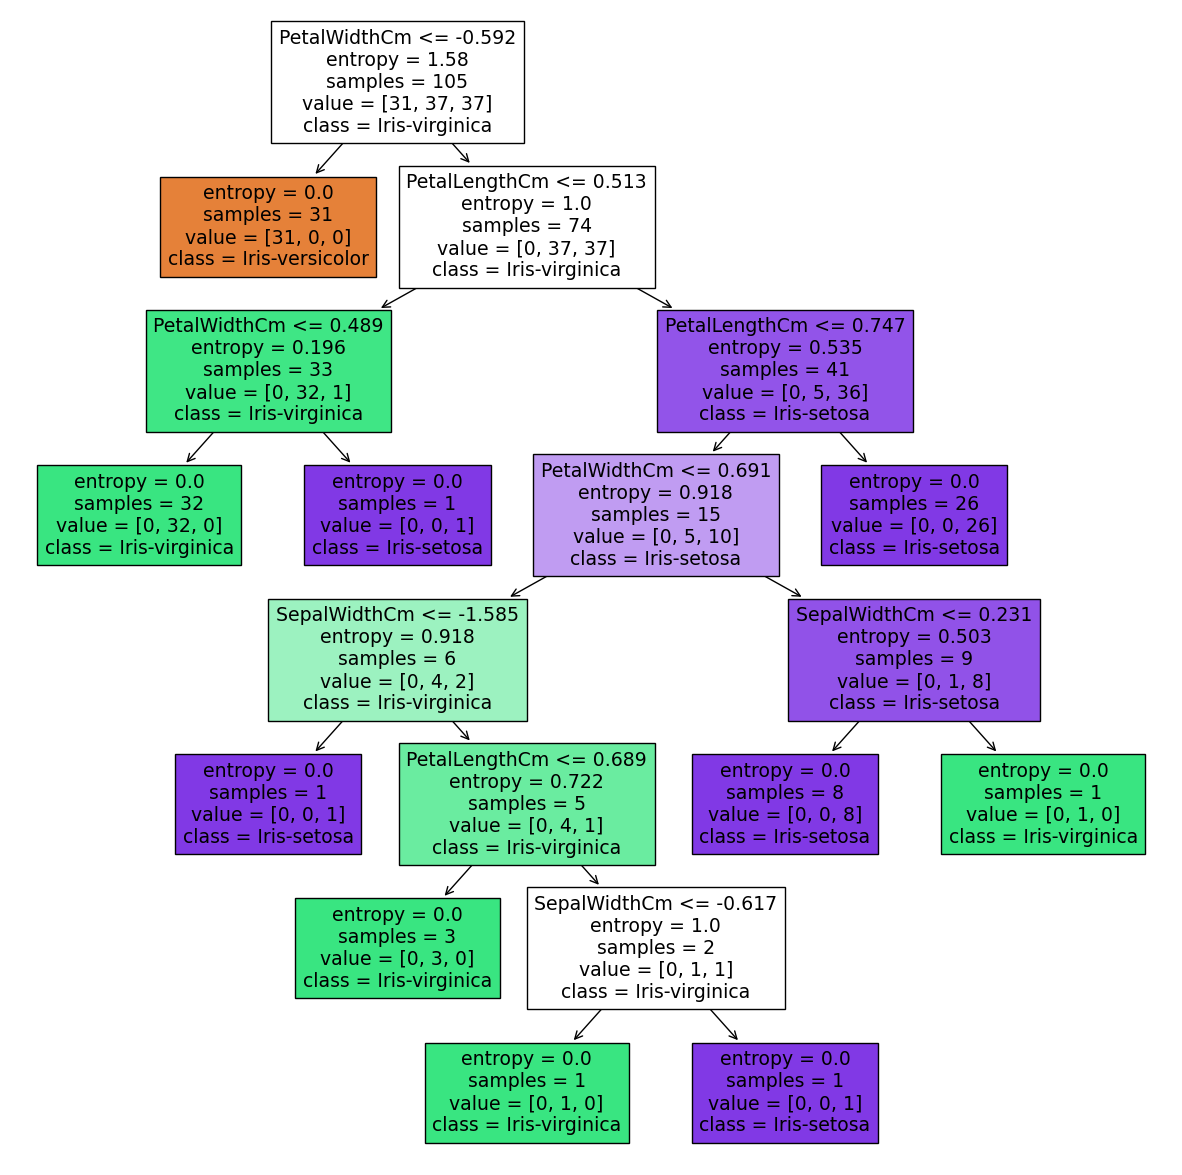

In [31]:
from sklearn import tree
plt.figure(figsize=(15,15))
# training data same order
tree.plot_tree(model,feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"],class_names=["Iris-versicolor","Iris-virginica","Iris-setosa"],filled=True)


In [28]:
# X[3]= Petal_width
# training data 70 % = Samples=105
# values [31,37,37] =>iris-vericcolor,iris-virginca,iris-setosa

In [ ]:
# regression model in decision tree tree construction is not need
# DecisionTreeRegression